In [ ]:
# Import libraries
import os
os.chdir("/Users/dimitrismarkopoulos/Desktop/regime-detection")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns ; sns.set_style("whitegrid")

from sklearn.preprocessing import StandardScaler

# Define Globs
media_path = "docs/media/"

In [2]:
df = pd.read_excel("data.xlsx",index_col=0)

print("Shape:", df.shape)
print("Missing values:", df.isna().sum().sum())
print("Features:",list(df.columns))

Shape: (5456, 37)
Missing values: 0
Features: ['USGG1M Index', 'USGG6M Index', 'USGG2YR Index', 'USGG3YR Index', 'USGG5YR Index', 'USGG10YR Index', 'USGG30YR Index', 'USYC2Y10Y Index', 'USYC3M10Y Index', 'USGGBE02 Index', 'USGGBE05 Index', 'USGGBE10 Index', 'USGGBE30 Index', 'USGGT05Y Index', 'MOVE Index', 'DXY Index', 'EURUSD Curncy', 'GBPUSD Curncy', 'USDJPY Curncy', 'USDMXN Curncy', 'SPX Index', 'NDX Index', 'RTY Index', 'MXWO Index', 'VIX Index', 'VIX3M Index', 'SKEW Index', 'PUT Index', 'CL1 Comdty', 'CO1 Comdty', 'NG1 Comdty', 'XAU Curncy', 'XAG Curncy', 'LOCADY Index', 'BDIY Index', 'GSCPI Index', 'BFCIUS Index']


Returns shape: (4962, 37)


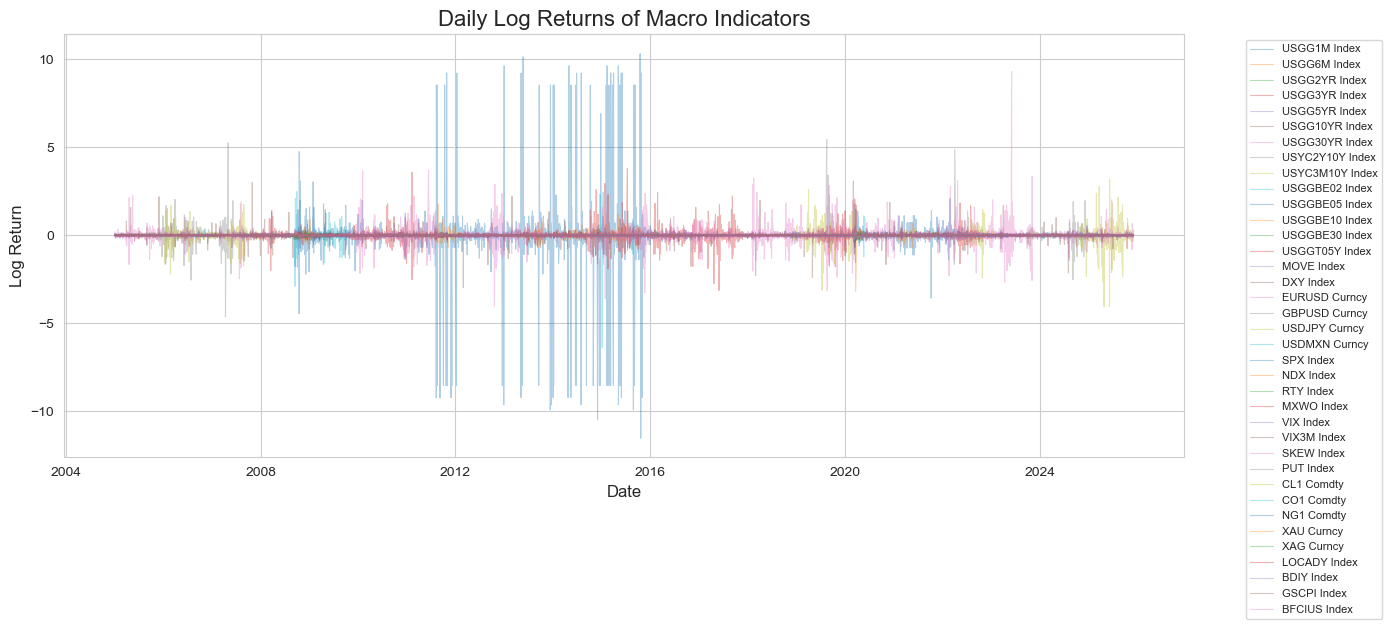

In [19]:
df_fixed = df.replace(0, 1e-6)
rets = np.log(df_fixed / df_fixed.shift(1)).dropna()
print("Returns shape:", rets.shape)

plt.figure(figsize=(14,6))
for col in rets.columns:
    plt.plot(rets.index, rets[col], alpha=0.35, linewidth=0.8)
plt.title("Daily Log Returns of Macro Indicators", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Log Return", fontsize=12)
plt.legend(rets.columns, bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.tight_layout()
plt.savefig(media_path + "macro_timeseries.png")
plt.show()

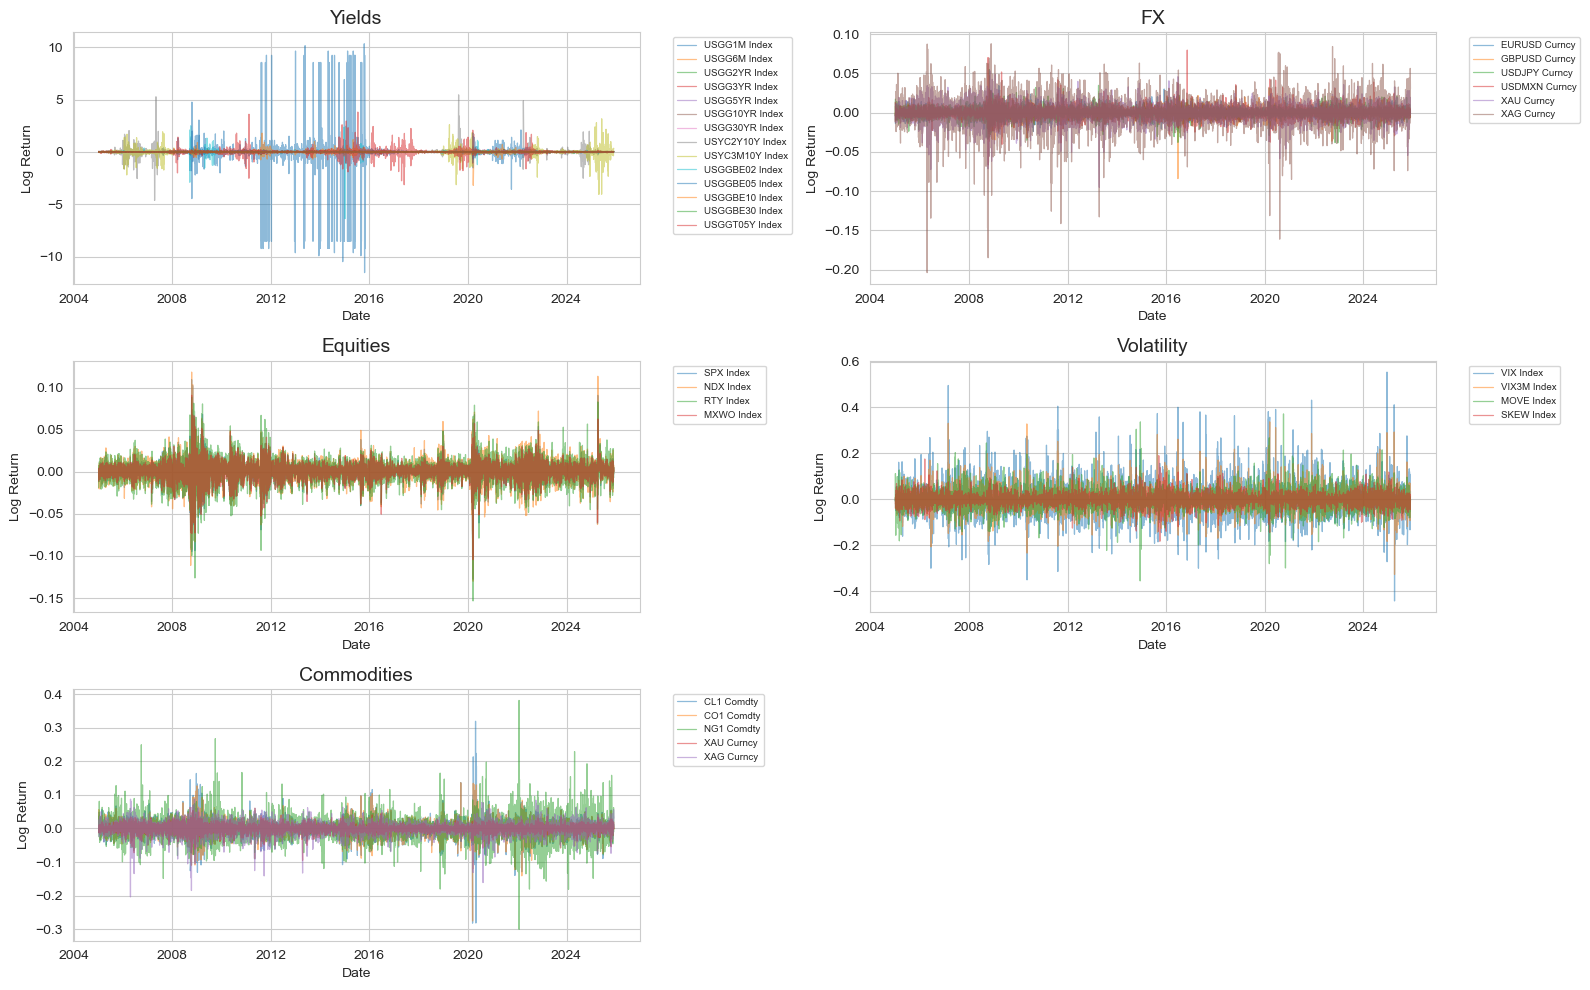

In [26]:
# Define groups
yields = [c for c in rets.columns if "USGG" in c or "USYC" in c]
fx     = [c for c in rets.columns if "Curncy" in c]
equity = ["SPX Index", "NDX Index", "RTY Index", "MXWO Index"]
vol    = ["VIX Index", "VIX3M Index", "MOVE Index", "SKEW Index"]
commod = [c for c in rets.columns if "Comdty" in c or "XAU" in c or "XAG" in c]

groups = {
    "Yields": yields,
    "FX": fx,
    "Equities": equity,
    "Volatility": vol,
    "Commodities": commod
}

plt.figure(figsize=(16,10))

for i, (name, cols) in enumerate(groups.items(), 1):
    plt.subplot(3, 2, i)
    for col in cols:
        plt.plot(rets.index, rets[col], alpha=0.5, linewidth=0.9, label=col)
    plt.title(name, fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.legend(fontsize=7, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.savefig(media_path + "groupby_macro_timeseries.png")
plt.show()

# Dimension Reduction

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [35]:
scaler = StandardScaler()
rets_z = pd.DataFrame(
    scaler.fit_transform(rets),
    index=rets.index,
    columns=rets.columns
)

X = rets_z.values # standardized returns
pca = PCA()
pca.fit(X);

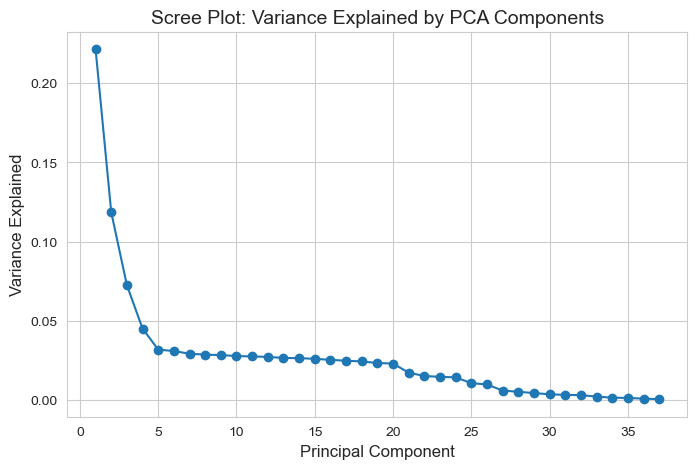

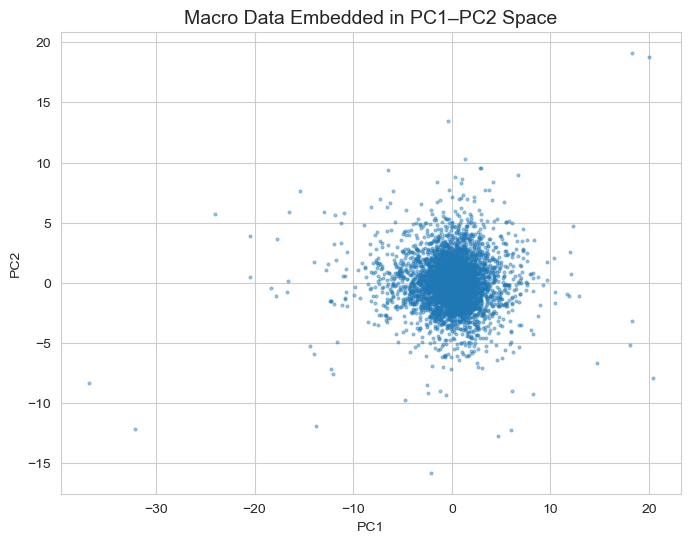

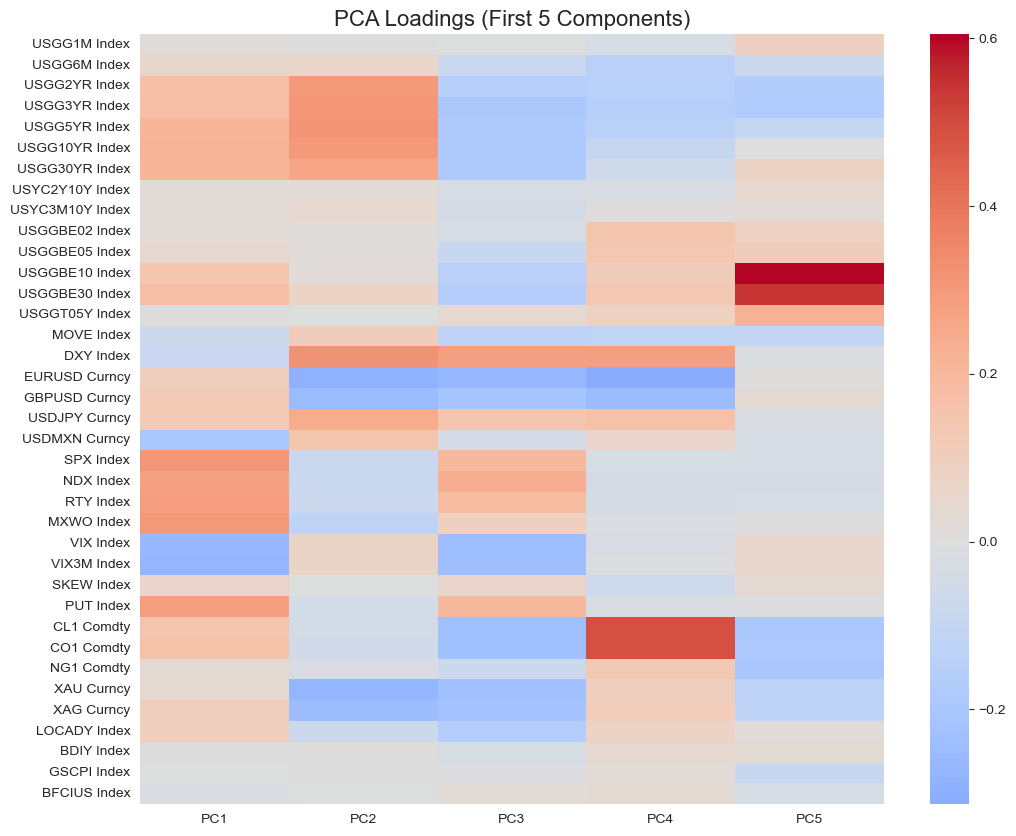

,PC1,PC2,PC3,PC4,PC5
USGG1M Index,0.016946,0.002893,0.002131,-0.031883,0.095183
USGG6M Index,0.053797,0.066017,-0.087084,-0.143662,-0.074025
USGG2YR Index,0.171630,0.302334,-0.150883,-0.146917,-0.167567
USGG3YR Index,0.174928,0.307117,-0.193003,-0.158544,-0.174329
USGG5YR Index,0.207840,0.318449,-0.179899,-0.145095,-0.100851


In [ ]:
# Scree Plot
plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_,
    marker='o'
)
plt.title("Scree Plot: Variance Explained by PCA Components", fontsize=14)
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Variance Explained", fontsize=12)
plt.show()

# PC1–PC2 Embedding of Data
pc_scores = pca.transform(X)[:, :2]   # first two PCs
plt.figure(figsize=(8,6))
plt.scatter(pc_scores[:,0], pc_scores[:,1], s=4, alpha=0.4)
plt.title("Macro Data Embedded in PC1-PC2 Space", fontsize=14)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# PCA Loadings: Which features drive each PC
loadings = pd.DataFrame(
    pca.components_.T[:, :5],  # look at first 5 PCs
    index=rets_z.columns,
    columns=[f"PC{i+1}" for i in range(5)]
)

plt.figure(figsize=(12,10))
sns.heatmap(loadings, cmap="coolwarm", center=0)
plt.title("PCA Loadings (First 5 Components)", fontsize=16)
plt.show()

loadings.head()